In [9]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib
import re
import bs4
import matplotlib.pyplot as plt
% matplotlib inline


In [43]:
def downloadWords(url):
    page = urllib.request.urlopen(url).read()
    soup = bs4.BeautifulSoup(page, 'html.parser')
    soup = soup.find_all("p")
    wordArr = []
    for txt in soup:
        words = txt.text.split(" ")
        for word in words:
            word = word.replace("\n" , "")
            wordArr.append(word)
    return wordArr


In [59]:
wordArr = downloadWords("https://www.nytimes.com/elections/2008/president/debates/transcripts/first-presidential-debate.html")
wordArr.append("https://www.nytimes.com/elections/2008/president/debates/transcripts/third-presidential-debate.html")
wordArr.append("https://www.nytimes.com/elections/2008/president/debates/transcripts/vice-presidential-debate.html")
wordArr.append("https://www.nytimes.com/elections/2008/president/debates/transcripts/second-presidential-debate.html")
uniqueWords = list(set(wordArr))

In [78]:
df = pd.DataFrame(data={"unique": uniqueWords})
df["count"] = [wordArr.count(x) for x in df.unique]
df.sort_values(by=['count'] , ascending=False)
asText = ''.join(wordArr)

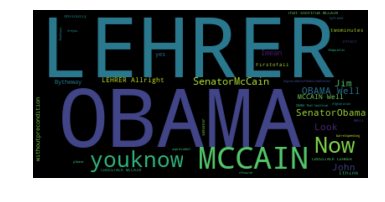

In [79]:
wordcloud = WordCloud().generate(asText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

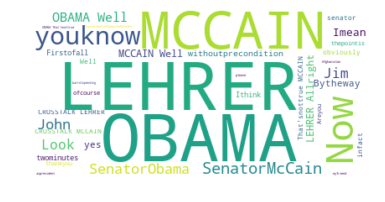

In [90]:
wordcloud = WordCloud(max_words=1000, contour_width=3, background_color="white").generate(asText)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [83]:
wordcloud.to_file("first_review.png")
